# <center> ML Course Project </center>
# <center> Face Recognition using Eigenfaces Approach </center>

***

## Importing necessary Python Libraries

In [124]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

## Load training images from the folder Celebrity images

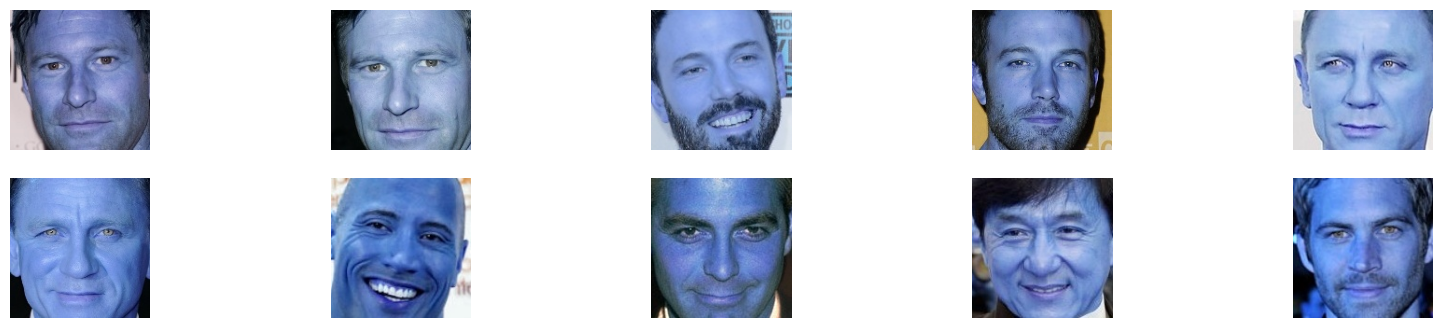

In [125]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

training_images = load_images_from_folder('C:/Users/jathi/Downloads/ML Project/Celebrity Images/Train')

i=0
plt.figure(figsize=(20, 4))
while(i<len(training_images)):
    img = Image.fromarray(training_images[i])
    plt.subplot(2,5,int(1+i/23))
    plt.axis('off')
    plt.imshow(img)
    i+=23

## Convert all images to grayscale

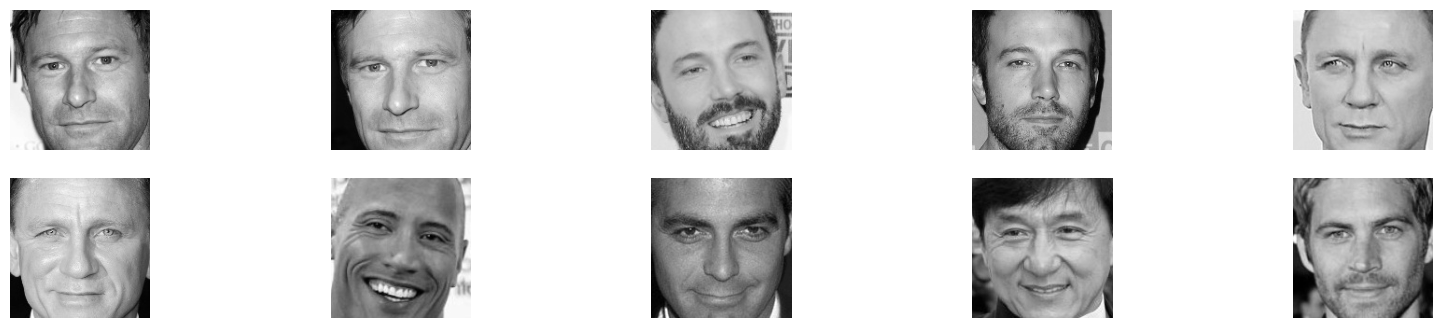

In [126]:
training_images_gray = []
for i in range(len(training_images)):
    training_images_gray.append(cv2.cvtColor(training_images[i], cv2.COLOR_BGR2GRAY))

i=0
plt.figure(figsize=(20, 4))
while(i<len(training_images_gray)):
    img = Image.fromarray(training_images_gray[i])
    plt.subplot(2,5,int(1+i/23))
    plt.axis('off')
    plt.imshow(img,cmap='gray')
    i+=23

## Convert training images gray to 1D array

In [127]:
training_images_gray_1D = []
for i in range(len(training_images_gray)):
    training_images_gray_1D.append(training_images_gray[i].flatten())

### Use PCA on training images and obtain 10 dimensional representation of each image

In [128]:
pca = PCA(n_components=10)
pca.fit(training_images_gray_1D)
training_images_gray_1D_pca = pca.transform(training_images_gray_1D)

## Display the eigen faces using matplotlib

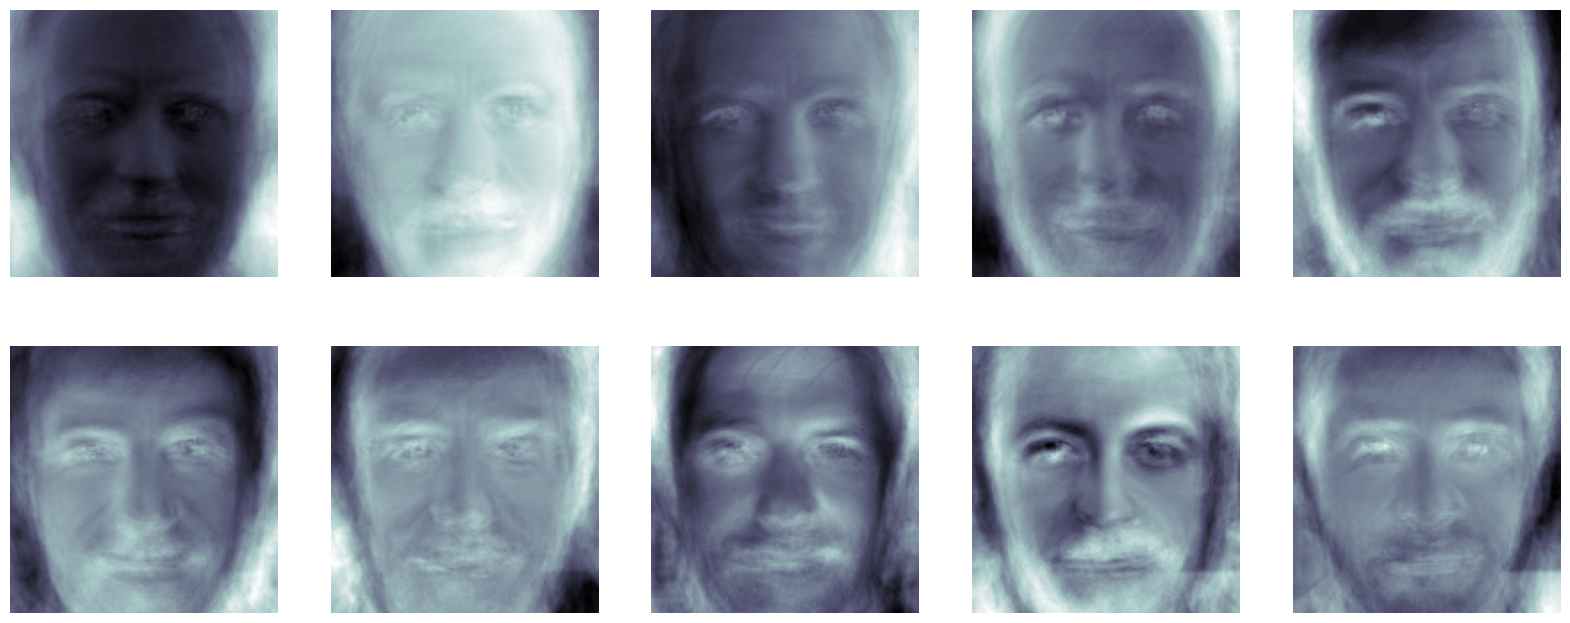

In [129]:
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(pca.components_[i].reshape(150, 150), cmap=plt.cm.bone)

## Get 10 dimensional representation of test images

In [130]:
test_images = load_images_from_folder('C:/Users/jathi/Downloads/ML Project/Celebrity Images/Test')
test_images_gray = []
for i in range(len(test_images)):
    test_images_gray.append(cv2.cvtColor(test_images[i], cv2.COLOR_BGR2GRAY))

test_images_gray_1D = []
for i in range(len(test_images_gray)):
    test_images_gray_1D.append(test_images_gray[i].flatten())

test_images_gray_1D_pca = pca.transform(test_images_gray_1D)

## Transforming test images 

In [131]:
test_images_gray_1D_pca = pca.transform(test_images_gray_1D)

## Import CSV file

In [132]:
df = pd.read_csv('PCA_train.csv')
df.head()

,Image,Label
0,Aaron Eckhart_1.jpg,0
1,Aaron Eckhart_10.jpg,0
2,Aaron Eckhart_11.jpg,0
3,Aaron Eckhart_12.jpg,0
4,Aaron Eckhart_13.jpg,0


## Convert categorical data to numerical data

In [133]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df.tail()

,Image,Label
217,Paul Walker_5.jpg,9
218,Paul Walker_6.jpg,9
219,Paul Walker_7.jpg,9
220,Paul Walker_8.jpg,9
221,Paul Walker_9.jpg,9


## Predict the class of test images

In [134]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(training_images_gray_1D_pca, df['Label'])

pred=knn.predict(test_images_gray_1D_pca)

pred

array([2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 8, 1, 0, 0, 6, 9, 9, 5, 6, 1, 0, 7,
       7, 0, 0, 2, 0, 8, 0, 9], dtype=int64)

## Importing the labels from test.csv

In [135]:
df_test = pd.read_csv('PCA_test.csv')
df_test['Label'] = le.fit_transform(df_test['Label'])
df_test.head()

,Image,Label
0,Aaron Eckhart_33.jpg,0
1,Aaron Eckhart_34.jpg,0
2,Aaron Eckhart_35.jpg,0
3,Ben Affleck_44.jpg,1
4,Ben Affleck_45.jpg,1


## Calculate accuracy

In [136]:
accuracy_score(df_test['Label'], knn.predict(test_images_gray_1D_pca))

0.43333333333333335

## Display the confusion matrix

<AxesSubplot: >

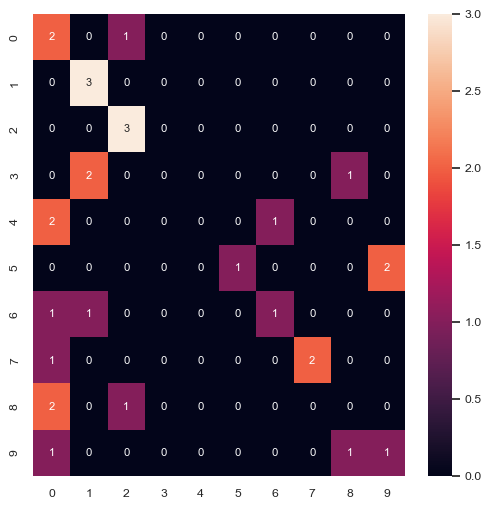

In [137]:
cf_matrix = confusion_matrix(df_test['Label'], pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=True,ax=ax,annot_kws={'size':8})

## Classification Report

In [138]:
target_names = ['Aaron Eckhart', 'Ben Affleck', 'Daniel Craig','David Schwimmer','Dwayne Johnson','George Clooney','Hugh Jackman',
                'Jackie Chan','Jim Carrey','Paul Walker']
print(classification_report(df_test['Label'], pred,zero_division=0,target_names=target_names))

                 precision    recall  f1-score   support

  Aaron Eckhart       0.22      0.67      0.33         3
    Ben Affleck       0.50      1.00      0.67         3
   Daniel Craig       0.60      1.00      0.75         3
David Schwimmer       0.00      0.00      0.00         3
 Dwayne Johnson       0.00      0.00      0.00         3
 George Clooney       1.00      0.33      0.50         3
   Hugh Jackman       0.50      0.33      0.40         3
    Jackie Chan       1.00      0.67      0.80         3
     Jim Carrey       0.00      0.00      0.00         3
    Paul Walker       0.33      0.33      0.33         3

       accuracy                           0.43        30
      macro avg       0.42      0.43      0.38        30
   weighted avg       0.42      0.43      0.38        30



## Plot graph n_components vs accuracy (model: KNN = 1)

Text(0, 0.5, 'accuracy')

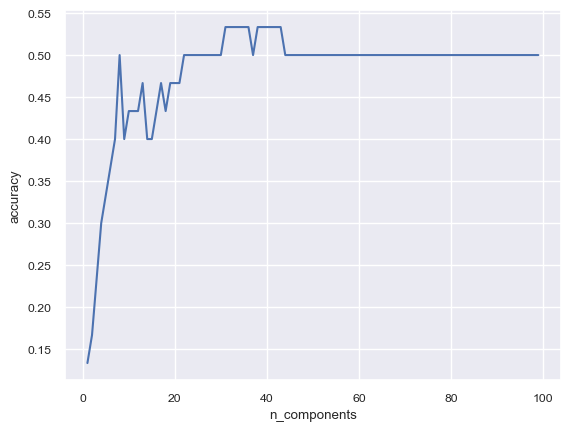

In [139]:
accuracy = []
for i in range(1, 100):
    pca = PCA(n_components=i)
    pca.fit(training_images_gray_1D)
    training_images_gray_1D_pca = pca.transform(training_images_gray_1D)
    knn.fit(training_images_gray_1D_pca, df['Label'])
    test_images_gray_1D_pca = pca.transform(test_images_gray_1D)
    accuracy.append(accuracy_score(df_test['Label'], knn.predict(test_images_gray_1D_pca)))
plt.plot(range(1, 100), accuracy)
plt.xlabel('n_components')
plt.ylabel('accuracy')

## Graph between n_neighbors and accuracy (n_components = 10)

Best accuracy is obtained for n_neighbors =  1
Best accuracy is  0.43333333333333335


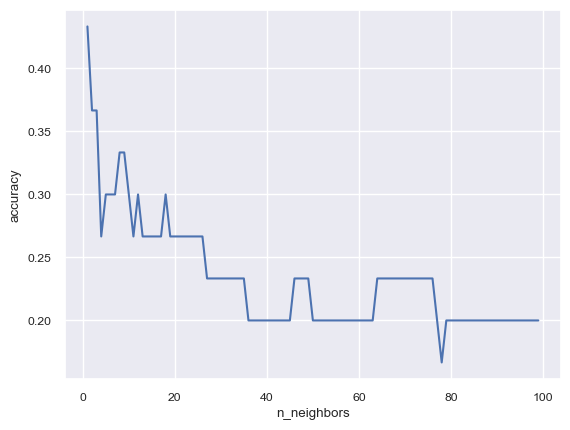

In [141]:
pca = PCA(n_components=10)
pca.fit(training_images_gray_1D)
training_images_gray_1D_pca = pca.transform(training_images_gray_1D)
test_images_gray_1D_pca = pca.transform(test_images_gray_1D)
accuracy = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_images_gray_1D_pca, df['Label'])
    accuracy.append(accuracy_score(df_test['Label'], knn.predict(test_images_gray_1D_pca)))
plt.plot(range(1, 100), accuracy)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

accuracy.index(max(accuracy))
print('Best accuracy is obtained for n_neighbors = ', accuracy.index(max(accuracy)) + 1)
print('Best accuracy is ', max(accuracy))

***

## Done by

- Tupili Krishna Gowtham Reddy (CS20B1036)
- B V Saketha Rama (CS20B1042)
- Jathin Nadella (CS20B1092)
- K Sai Dinesh (CS20B1122)
